In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Load testing dataset
test_dataset_path = "C:\\Users\\ADMIN\\projests\\Wild-Animal-Detection-and-Alert-System-using-YOLO-v8-Model-main\\Animal_test_train_set\\Animals"  # Update this path to the location of your test dataset

test_ds = image_dataset_from_directory(
    test_dataset_path,
    seed=123,
    image_size=(180, 180),  # Make sure this matches the image size used in training
    batch_size=32
)

Found 697 files belonging to 9 classes.


In [3]:
from tensorflow.keras.models import load_model

# Load the trained model
class_names = test_ds.class_names
print(class_names)

# Load the trained model
model = load_model("animal_intrusion.h5")

['Cheetah', 'Hyena', 'Jaguar', 'Tiger', 'bear_png', 'chinkara', 'elephant', 'lion', 'pig']


In [4]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


22/22 [==============================] - 5s 201ms/step - loss: 0.8235 - accuracy: 0.8135
Test Accuracy: 81.35%
Test Loss: 0.8235


1/1 [==============================] - 0s 180ms/step


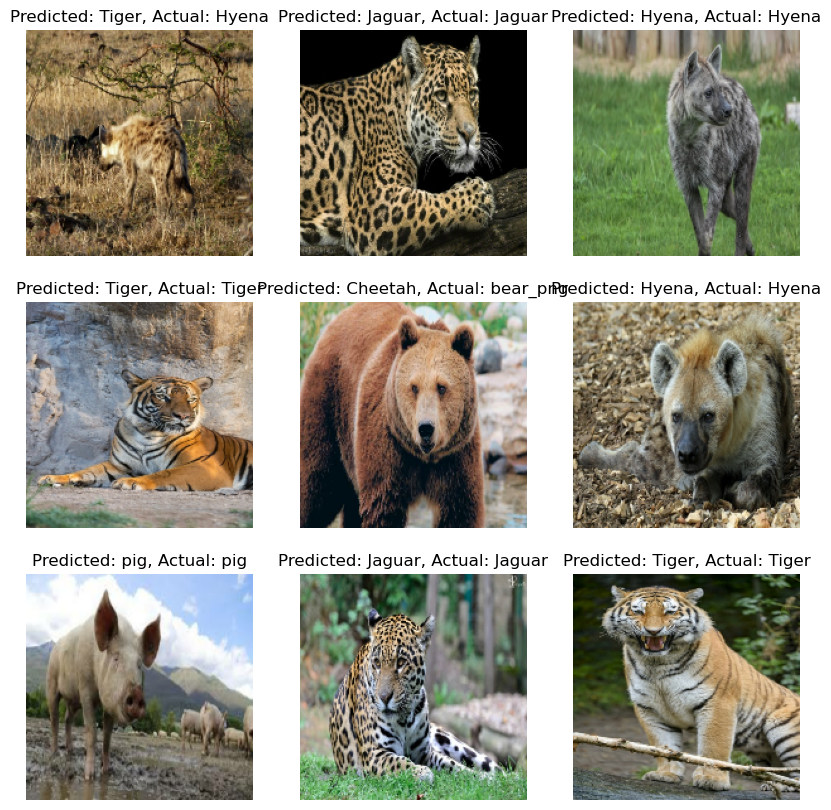

In [10]:
import matplotlib.pyplot as plt
import numpy as np

for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {class_names[predicted_labels[i]]}, Actual: {class_names[labels[i]]}")
        plt.axis("off")
    plt.show()

